# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lefkada
Processing Record 2 of Set 1 | walvis bay
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | bridgewater
Processing Record 6 of Set 1 | tobi village
City not found. Skipping...
Processing Record 7 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | bodaybo
Processing Record 14 of Set 1 | pont rouge
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | al ghayzah
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | noumea
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | ni

Processing Record 38 of Set 4 | fonte boa
Processing Record 39 of Set 4 | kidal
Processing Record 40 of Set 4 | badger
Processing Record 41 of Set 4 | gallivare
City not found. Skipping...
Processing Record 42 of Set 4 | kamloops
Processing Record 43 of Set 4 | gonabad
Processing Record 44 of Set 4 | baiyin
Processing Record 45 of Set 4 | northam
Processing Record 46 of Set 4 | deqen
Processing Record 47 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | kolonia
Processing Record 0 of Set 5 | kirensk
Processing Record 1 of Set 5 | yarega
Processing Record 2 of Set 5 | balkashino
Processing Record 3 of Set 5 | ola
Processing Record 4 of Set 5 | port blair
Processing Record 5 of Set 5 | abraham's bay
City not found. Skipping...
Processing Record 6 of Set 5 | praia da vitoria
Processing Record 7 of Set 5 | farafangana
Processing Record 8 of Set 5 | iquique
Processing Record 9 of Set 5 | camalu
Processing Record 1

Processing Record 26 of Set 8 | fale old settlement
Processing Record 27 of Set 8 | solnechnyy
Processing Record 28 of Set 8 | saldanha
Processing Record 29 of Set 8 | noosa heads
Processing Record 30 of Set 8 | lorengau
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | tazacorte
Processing Record 33 of Set 8 | elverum
Processing Record 34 of Set 8 | meulaboh
Processing Record 35 of Set 8 | barra de santo antonio
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | kollo
Processing Record 38 of Set 8 | malango
Processing Record 39 of Set 8 | borzya
Processing Record 40 of Set 8 | gadzhiyevo
Processing Record 41 of Set 8 | mafinga
Processing Record 42 of Set 8 | moengo
Processing Record 43 of Set 8 | itanhem
Processing Record 44 of Set 8 | port shepstone
Processing Record 45 of Set 8 | qarah
Processing Record 46 of Set 8 | aleg
Processing Record 47 of Set 8 | crane
Processing Record 48 of Set 8 | scottburgh
Processing Record 49 of Set 8 | usogorsk


Processing Record 15 of Set 12 | christchurch
Processing Record 16 of Set 12 | ribeira brava
Processing Record 17 of Set 12 | santa cruz
Processing Record 18 of Set 12 | gondar
Processing Record 19 of Set 12 | makurazaki
Processing Record 20 of Set 12 | faya-largeau
Processing Record 21 of Set 12 | purranque
Processing Record 22 of Set 12 | chalus
Processing Record 23 of Set 12 | asasa
Processing Record 24 of Set 12 | jinzhou
Processing Record 25 of Set 12 | guarapari
Processing Record 26 of Set 12 | vilyuchinsk
Processing Record 27 of Set 12 | pfalzgrafenweiler
Processing Record 28 of Set 12 | west bay
Processing Record 29 of Set 12 | fannuj
City not found. Skipping...
Processing Record 30 of Set 12 | amahai
Processing Record 31 of Set 12 | ain oussera
Processing Record 32 of Set 12 | kamina
Processing Record 33 of Set 12 | floro
Processing Record 34 of Set 12 | mount gambier
Processing Record 35 of Set 12 | matoury
Processing Record 36 of Set 12 | le morne-rouge
Processing Record 37 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lefkada,38.8275,20.7019,67.91,88,20,0.00,GR,1691367967
1,walvis bay,-22.9575,14.5053,59.95,47,0,1.14,NA,1691367723
2,grytviken,-54.2811,-36.5092,20.16,87,100,6.26,GS,1691367905
3,iqaluit,63.7506,-68.5145,46.13,81,40,9.22,CA,1691367904
4,bridgewater,44.3835,-64.5155,69.48,62,2,8.05,CA,1691367967


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lefkada,38.8275,20.7019,67.91,88,20,0.00,GR,1691367967
1,walvis bay,-22.9575,14.5053,59.95,47,0,1.14,NaN,1691367723
2,grytviken,-54.2811,-36.5092,20.16,87,100,6.26,GS,1691367905
3,iqaluit,63.7506,-68.5145,46.13,81,40,9.22,CA,1691367904
4,bridgewater,44.3835,-64.5155,69.48,62,2,8.05,CA,1691367967


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

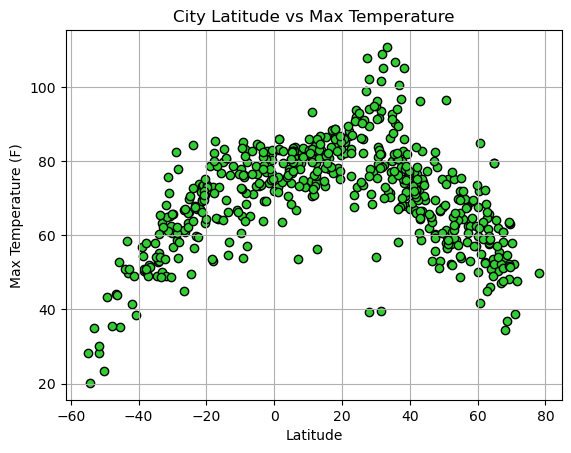

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="limegreen", edgecolors="black")

# Incorporate the other graph properties
# https://stackoverflow.com/questions/20616754/pandas-how-to-display-minor-grid-lines-on-x-axis-in-pd-dataframe-plot
# README add gridlines
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
#figure out how to add TODAY() date to the title
plt.title('City Latitude vs Max Temperature')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

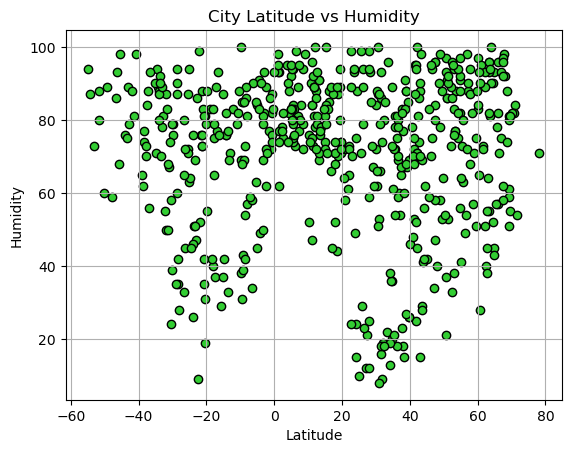

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="limegreen", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

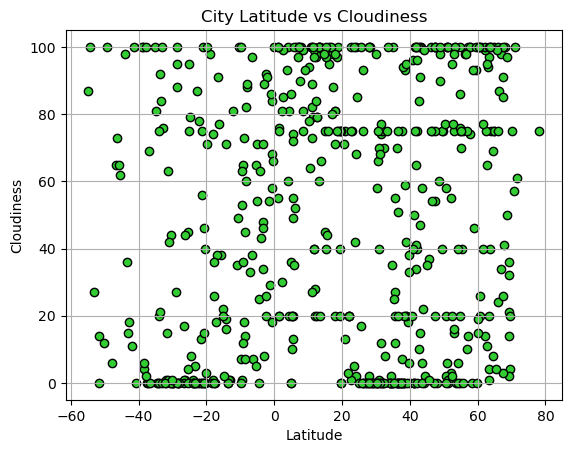

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="limegreen", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

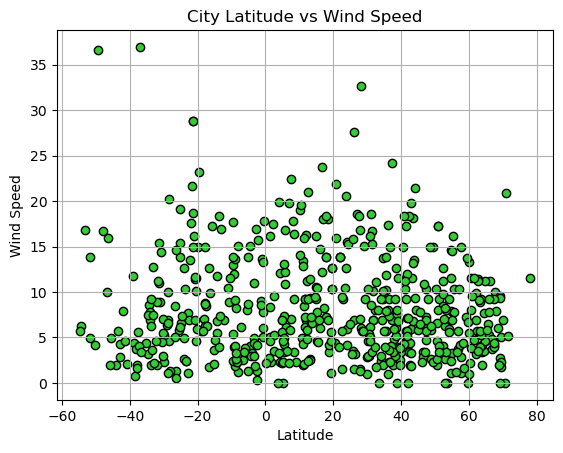

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="limegreen", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.grid('on', which='major', axis='x')
plt.grid('on', which='major', axis='y')

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
#COME BACK TO THIS
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lefkada,38.8275,20.7019,67.91,88,20,0.00,GR,1691367967
3,iqaluit,63.7506,-68.5145,46.13,81,40,9.22,CA,1691367904
4,bridgewater,44.3835,-64.5155,69.48,62,2,8.05,CA,1691367967
7,olonkinbyen,70.9221,-8.7187,38.79,84,100,20.94,SJ,1691367692
8,albany,42.6001,-73.9662,72.25,74,84,2.01,US,1691367886


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,walvis bay,-22.9575,14.5053,59.95,47,0,1.14,NaN,1691367723
2,grytviken,-54.2811,-36.5092,20.16,87,100,6.26,GS,1691367905
5,adamstown,-25.0660,-130.1015,69.73,63,95,19.08,PN,1691367904
6,blackmans bay,-43.0167,147.3167,49.73,89,15,4.25,AU,1691367901
9,carnarvon,-24.8667,113.6333,70.54,64,79,6.60,AU,1691367968


###  Temperature vs. Latitude Linear Regression Plot

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_n

'y = -0.41x + 87.95'

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_s

'y = 0.79x + 82.33'

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_n

'y = -0.09x + 74.74'

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_s

'y = -0.16x + 66.58'

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_n

'y = -0.15x + 58.27'

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_s

'y = 0.17x + 41.38'

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_n

'y = -0.04x + 9.46'

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_s

'y = -0.01x + 8.16'

**Discussion about the linear relationship:** YOUR RESPONSE HERE